In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('../../data/formatted/Redfin/Redfin_April24_Formatted.csv', dtype=str)

In [3]:
df

,period_end,region,median_sale_price,median_list_price,homes_sold,pending_sales,new_listings,inventory
0,2013-01-31,44815,77250.0,NaN,2.0,NaN,NaN,1.0
1,2021-09-30,75093,590000.0,599000.0,199.0,50.0,183.0,69.0
2,2022-09-30,44124,223500.0,214000.0,205.0,45.0,211.0,111.0
3,2017-11-30,52773,174000.0,285000.0,6.0,NaN,2.0,4.0
4,2012-04-30,61865,76000.0,NaN,3.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2713757,2018-05-31,11231,2017500.0,1999999.0,42.0,2.0,109.0,153.0
2713758,2020-06-30,16872,155000.0,NaN,1.0,NaN,NaN,2.0
2713759,2019-11-30,48880,70000.0,82400.0,25.0,6.0,18.0,22.0
2713760,2022-04-30,22736,402280.0,509999.0,3.0,NaN,1.0,NaN


In [4]:
df.describe().round()

,period_end,region,median_sale_price,median_list_price,homes_sold,pending_sales,new_listings,inventory
count,2713762,2713762,2709242,2587363,2709280,2086379,2572848,2537033
unique,146,24065,144698,105340,797,273,922,1185
top,2021-09-30,13339,150000.0,149900.0,1.0,1.0,1.0,1.0
freq,20501,146,14051,17879,269817,319587,143278,113792


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2713762 entries, 0 to 2713761
Data columns (total 8 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   period_end         object
 1   region             object
 2   median_sale_price  object
 3   median_list_price  object
 4   homes_sold         object
 5   pending_sales      object
 6   new_listings       object
 7   inventory          object
dtypes: object(8)
memory usage: 165.6+ MB


In [6]:
# convert vars to proper type
df['period_end'] = pd.to_datetime(df['period_end'])
df['region'] = df['region'].astype(str)
df['median_sale_price'] = df['median_sale_price'].astype(float)
df['median_list_price'] = df['median_list_price'].astype(float)
df['homes_sold'] = df['homes_sold'].astype(float)
df['pending_sales'] = df['pending_sales'].astype(float)
df['new_listings'] = df['new_listings'].astype(float)
df['inventory'] = df['inventory'].astype(float)

In [7]:
# number of regions * number of months in the data is not equal to the total number of rows in the dataset
# there are missing entries (not just null values)

In [8]:
# number of regions:
df['region'].nunique()

24065

In [9]:
# number of months:
df['period_end'].nunique()

146

In [10]:
# number of regions * number of months in the data
df['region'].nunique() * df['period_end'].nunique()

3513490

In [11]:
# total number of rows in the dataset
len(df)

2713762

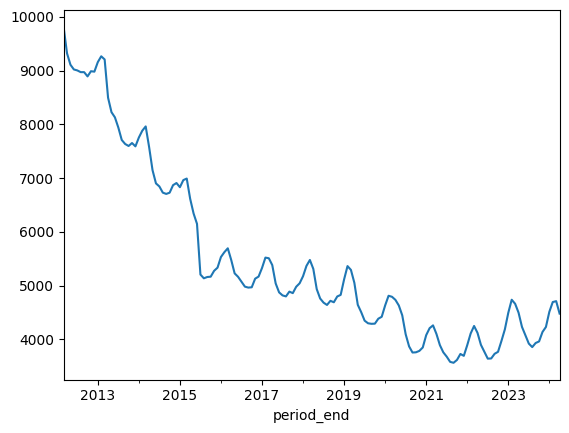

In [12]:
# counts of dates missing (total # of zip codes - # of unique zips contained in the dataframe at time t)
df.groupby('period_end')['period_end'].count().transform(lambda x : df['region'].nunique() - x).plot();

## Insert missing entries

In [13]:
date_range = pd.date_range(start=df['period_end'].min(), end=df['period_end'].max(), freq='M')

# create a dataframe with all combinations of zip codes and dates
full_index = pd.MultiIndex.from_product([df['region'].unique(), date_range], names=['region', 'period_end'])
full_index_df = pd.DataFrame(index=full_index).reset_index()

# merge original with the new dataframe to fill missing rows
merged_df = pd.merge(full_index_df, df, how='left', on=['region', 'period_end'])

In [14]:
# check result
merged_df[merged_df['region'] == '10516']

,region,period_end,median_sale_price,median_list_price,homes_sold,pending_sales,new_listings,inventory
790882,10516,2012-03-31,NaN,NaN,NaN,NaN,NaN,NaN
790883,10516,2012-04-30,NaN,NaN,NaN,NaN,NaN,NaN
790884,10516,2012-05-31,NaN,NaN,NaN,NaN,NaN,NaN
790885,10516,2012-06-30,NaN,NaN,NaN,NaN,NaN,NaN
790886,10516,2012-07-31,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
791023,10516,2023-12-31,640000.0,540000.0,16.0,3.0,6.0,8.0
791024,10516,2024-01-31,602500.0,540000.0,14.0,1.0,10.0,7.0
791025,10516,2024-02-29,617500.0,562500.0,10.0,1.0,12.0,11.0
791026,10516,2024-03-31,575000.0,587000.0,7.0,6.0,16.0,12.0


In [15]:
# original
df[df['region'] == '10516']

,period_end,region,median_sale_price,median_list_price,homes_sold,pending_sales,new_listings,inventory
6299,2016-02-29,10516,501250.0,499450.0,16.0,2.0,22.0,54.0
19376,2022-06-30,10516,735750.0,682000.0,22.0,7.0,28.0,18.0
33782,2017-06-30,10516,475000.0,584950.0,15.0,4.0,46.0,68.0
38375,2022-03-31,10516,857500.0,614900.0,18.0,7.0,21.0,13.0
88184,2016-03-31,10516,512250.0,499000.0,12.0,1.0,27.0,58.0
...,...,...,...,...,...,...,...,...
2489856,2021-06-30,10516,566360.0,610000.0,22.0,4.0,27.0,24.0
2502528,2018-03-31,10516,461500.0,540000.0,13.0,3.0,25.0,33.0
2521865,2019-11-30,10516,507200.0,497000.0,15.0,2.0,18.0,38.0
2570233,2020-06-30,10516,387500.0,599000.0,8.0,5.0,29.0,30.0


In [16]:
# overwrite df with our new dataframe
df = merged_df.copy()

## Analysis of missing values

In [17]:
df.isna().sum()

region                     0
period_end                 0
median_sale_price     804248
median_list_price     926127
homes_sold            804210
pending_sales        1427111
new_listings          940642
inventory             976457
dtype: int64

In [18]:
# percentage of data missing for var
(df.isna().sum() / len(df)) * 100 // 1

region                0.0
period_end            0.0
median_sale_price    22.0
median_list_price    26.0
homes_sold           22.0
pending_sales        40.0
new_listings         26.0
inventory            27.0
dtype: float64

In [19]:
# pending sales has more missing data than the others... remove it for now
df = df.drop('pending_sales', axis=1)

### median_sale_price

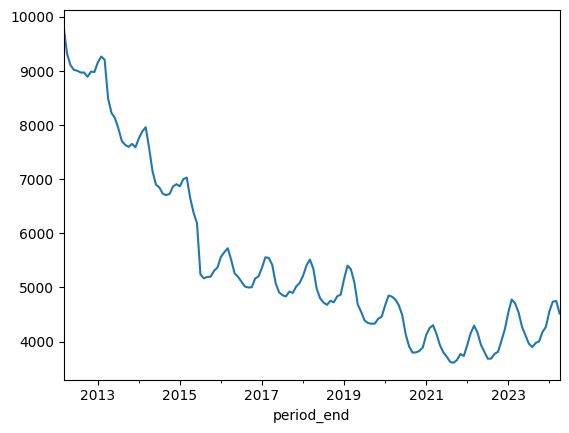

In [20]:

df[df['median_sale_price'].isna()].groupby('period_end')['region'].count().plot();

### median_list_price

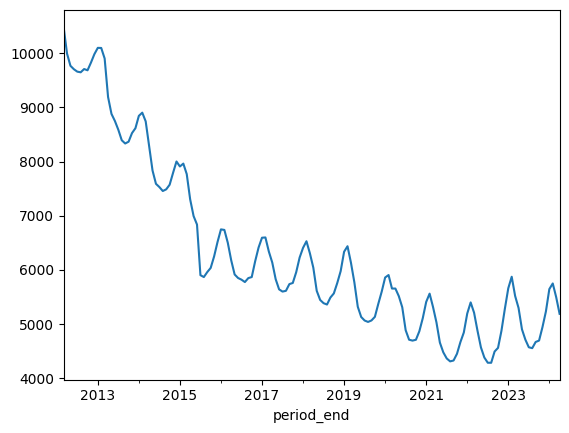

In [21]:
df[df['median_list_price'].isna()].groupby('period_end')['region'].count().plot();

### homes_sold

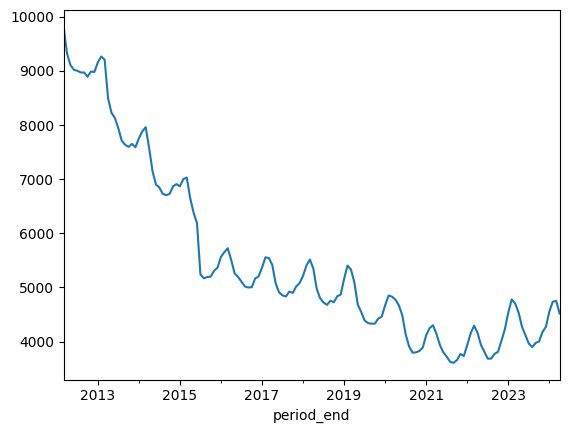

In [22]:
df[df['homes_sold'].isna()].groupby('period_end')['region'].count().plot();

### new_listings

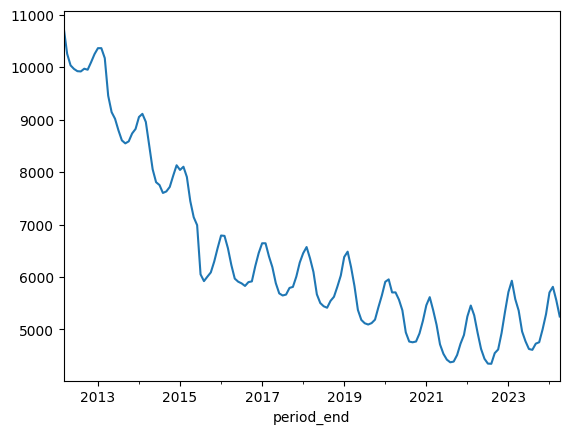

In [23]:
df[df['new_listings'].isna()].groupby('period_end')['region'].count().plot();

### Inventory

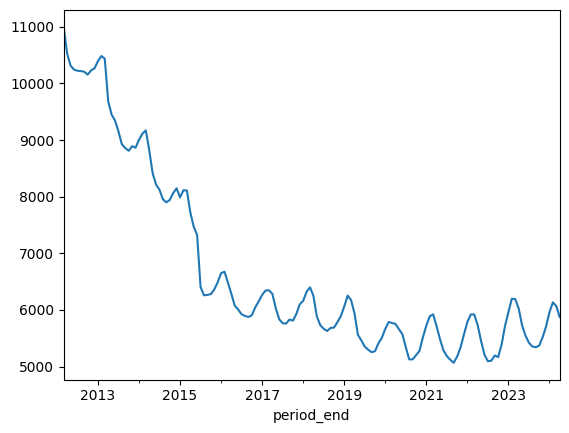

In [24]:
df[df['inventory'].isna()].groupby('period_end')['region'].count().plot();

In [25]:
# all of the covariates have a large drop in the number of missing variables after 2015. use data from 2016 and on
df = df[df['period_end'] > '2016-01-01'].copy()

In [26]:
# calculate the total number of missing values for each zip code

grouped_data = df.groupby('region')
missing_counts_per_group = grouped_data.apply(lambda x: x.isna().sum())
missing_counts_per_group = missing_counts_per_group.sum(axis=1)

In [27]:
missing_counts_per_group.sort_values()

region
93453      0
32962      0
32963      0
63019      0
32966      0
        ... 
20704    500
54413    500
54344    500
20656    500
75047    500
Length: 24065, dtype: int64

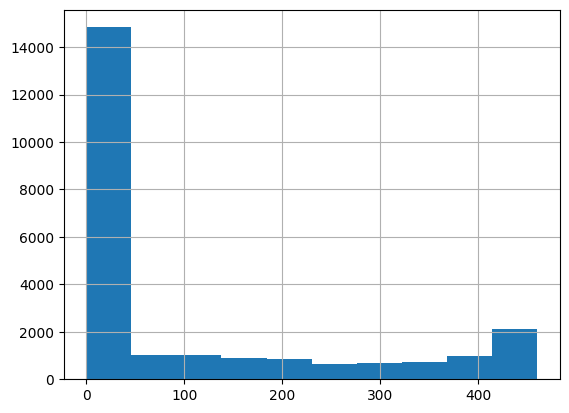

In [28]:
missing_counts_per_group.hist();

In [28]:
# 5 covariates * # of months in the data = total number of data points for each group
5 * df['period_end'].nunique()

500

In [29]:
# remove zips with more than 300 values missing
zips_to_remove = missing_counts_per_group[missing_counts_per_group.values > 300].index.values
df = df[~df['region'].isin(zips_to_remove)].copy()

In [30]:
# there is a lot of overlap between missing values across different covariates. For now we can 
# look at just median sale price since it has the least number of missing values
df['is_sale_nan'] = df['median_sale_price'].isna().astype(int)

In [31]:
df[df['median_sale_price'].isna()].tail(10)

,region,period_end,median_sale_price,median_list_price,homes_sold,new_listings,inventory,is_sale_nan
3376316,71108,2017-09-30,NaN,NaN,NaN,NaN,NaN,1
3376317,71108,2017-10-31,NaN,NaN,NaN,NaN,NaN,1
3376318,71108,2017-11-30,NaN,NaN,NaN,NaN,NaN,1
3376319,71108,2017-12-31,NaN,NaN,NaN,NaN,NaN,1
3376320,71108,2018-01-31,NaN,NaN,NaN,NaN,NaN,1
3376321,71108,2018-02-28,NaN,NaN,NaN,NaN,NaN,1
3376322,71108,2018-03-31,NaN,NaN,NaN,NaN,NaN,1
3376323,71108,2018-04-30,NaN,NaN,NaN,NaN,NaN,1
3376324,71108,2018-05-31,NaN,NaN,NaN,NaN,NaN,1
3376347,71108,2020-04-30,NaN,NaN,NaN,NaN,NaN,1


In [32]:
# helper function to count the number of consecutive missing values in timeseries data
def count_conseq(x):
  return (x * (x.groupby((x != x.shift()).cumsum()).cumcount() + 1))

In [33]:
# create new column that will have a running count of consecutive missing values w.r.t each zip code
df['conseq_sale_nan'] = df.groupby('region')['is_sale_nan'].transform(count_conseq)

In [34]:
df[df['median_sale_price'].isna()].tail(10)

,region,period_end,median_sale_price,median_list_price,homes_sold,new_listings,inventory,is_sale_nan,conseq_sale_nan
3376316,71108,2017-09-30,NaN,NaN,NaN,NaN,NaN,1,21
3376317,71108,2017-10-31,NaN,NaN,NaN,NaN,NaN,1,22
3376318,71108,2017-11-30,NaN,NaN,NaN,NaN,NaN,1,23
3376319,71108,2017-12-31,NaN,NaN,NaN,NaN,NaN,1,24
3376320,71108,2018-01-31,NaN,NaN,NaN,NaN,NaN,1,25
3376321,71108,2018-02-28,NaN,NaN,NaN,NaN,NaN,1,26
3376322,71108,2018-03-31,NaN,NaN,NaN,NaN,NaN,1,27
3376323,71108,2018-04-30,NaN,NaN,NaN,NaN,NaN,1,28
3376324,71108,2018-05-31,NaN,NaN,NaN,NaN,NaN,1,29
3376347,71108,2020-04-30,NaN,NaN,NaN,NaN,NaN,1,1


In [35]:
max_conseq_missing = df.groupby('region')['conseq_sale_nan'].max()

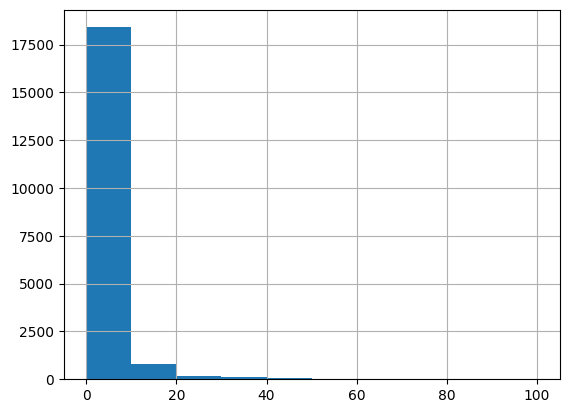

In [36]:
max_conseq_missing.hist();

In [37]:
# remove any zip code with more than 2 years of consecutive missing values 
zips_to_remove = max_conseq_missing[max_conseq_missing.values > 24].index.values
df = df[~df['region'].isin(zips_to_remove)]

In [38]:
df = df.drop(['is_sale_nan', 'conseq_sale_nan'], axis=1)

In [39]:
df.to_csv('../../data/processed/Redfin/Redfin_April24_Processed.csv', index= False)